# Case Study on Testing of Hypothesis

### A company started to invest in digital marketing as a new way of their product promotions.For that they collected data and decided to carry out a study on it.
### ● The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.
### ● The company needs to check whether there is any dependency between the features “Region” and “Manager”.
### Help the company to carry out their study with the help of data provided.

In [1]:
# Importing Pandas Library as 'pd'
import pandas as pd
# Importing NumPy Library as 'np'
import numpy as np
# Importing matplot pyplot Library as 'plt'
import matplotlib.pyplot as plt
# Importing seaborn Library as 'sns'
import seaborn as sns
# Importing statistics library
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

### Read the data into python.

In [2]:
# Getting data from Local CSV File and copying into 'data' Datafram
data=pd.read_csv('Sales_add.csv')

In [3]:
# Getting data of dataframe data
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [4]:
# Getting data of dataframe data
data.tail()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
17,Month-18,Region - C,Manager - B,167996,191517
18,Month-19,Region - B,Manager - A,132135,227040
19,Month-20,Region - A,Manager - B,152493,212579
20,Month-21,Region - B,Manager - A,147425,263388
21,Month-22,Region - A,Manager - C,130263,243020


In [6]:
#Shape of dataset.
data.shape

(22, 5)

> ***Insights:-***
* Here 22 rows and 5 columns in the dataset. 

In [7]:
#Information about dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


> ***Insights:-***
* 1.Data set showing the sales details of a company of 22 observations.<br>
* 2.There are 5 features in total.<br>
* 3.All the features are object and int data-type with 64 bit.</b>

### Check for null values

In [8]:
#Checking null values 
data.isna().sum().to_frame()

,0
Month,0
Region,0
Manager,0
Sales_before_digital_add(in $),0
Sales_After_digital_add(in $),0


> ***Insights:-***
* No null values found.

### ● The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

In [9]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


> ***Insights:-***
* The mean of the Sales_before_digital_add is 149239.954545 and Standard deviation is 14844.042921.
* The mean of the Sales_after_digital_add is 231123.727273 and Standard deviation is 25556.777061.

### ***Plotting a kde plot for the features Sales_before_digital_add and Sales_after_digital_add***

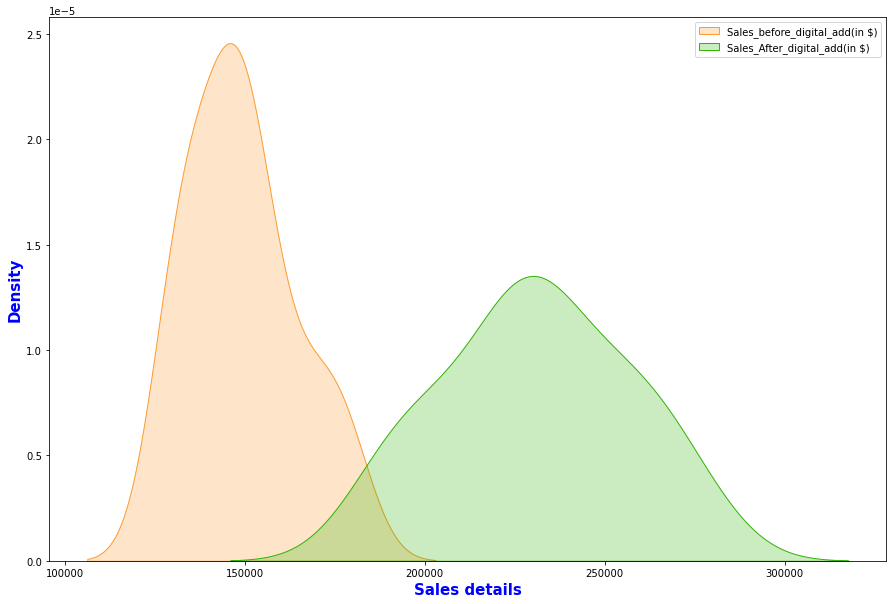

In [34]:
plt.figure(figsize=(15, 10))
sns.kdeplot(data['Sales_before_digital_add(in $)'], label="Sales_before_digital_add(in $)", shade = True, color = '#FE9A2E')
sns.kdeplot(data['Sales_After_digital_add(in $)'], label="Sales_After_digital_add(in $)", shade = True, color = '#31B404')
plt.xlabel('Sales details', color='blue', fontweight='bold',fontsize=15)
plt.ylabel('Density',color='blue', fontweight='bold',fontsize=15)
plt.legend();

> ***Define Hypotheses:- ***
*   The Null Hypothesis, ***H(0) - The sales not increase after the digital add.***
*   The Alternative Hypothesis, ***H(a) - The sales increase after the digital add.***
*   Significance level = 5%
*   Here, We are doing **One Tailed T Test**

In [10]:
ttest,pval = ttest_ind(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'],alternative='greater')
print('Test statistic is:- ',ttest)
print('P-value for One tailed test is:- ' ,pval)

Test statistic is:-  -12.995084451110877
P-value for One tailed test is:-  0.9999999999999999


In [11]:
if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Accept null hypothesis


> ***Conclusion :- ***
*   Since the ***P-value is smaller than the significance level***, we accept our Alternative Hypothesis. ***Thus, We conclude that - The digital add helped to increase the sales.***

### ● The company needs to check whether there is any dependency between the features “Region” and “Manager”.

> ***Define Hypotheses:- ***
*   The Null Hypothesis, ***H(0) -There is No dependency between 'Region' and 'Manager'.***
*   The Alternative Hypothesis, ***H(a) - Dependency between 'Region' and 'Manager'.***
*   Significance level = 5%
*   **

In [13]:
# To find the gender count using 'value_counts' method.
contingency_table=pd.crosstab(data['Region'], data['Manager'])
contingency_table

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


<AxesSubplot:xlabel='Manager', ylabel='Region'>

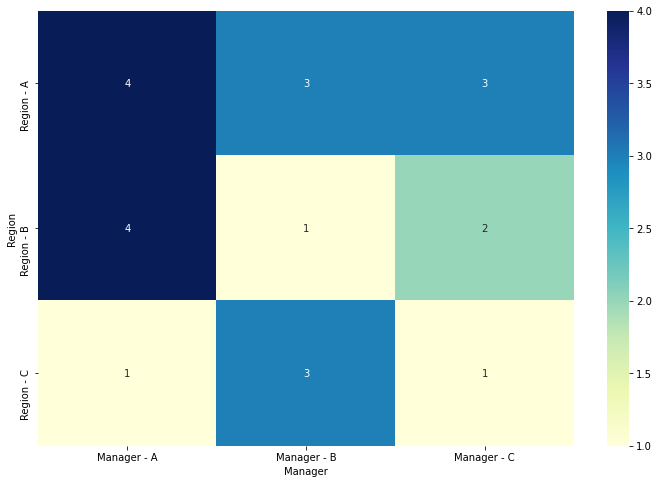

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")

In [19]:
# Chi-square test of independence
from scipy.stats import chi2_contingency
(chi2, p, dof,expected) = chi2_contingency(contingency_table)

In [24]:
print("chi2     :" ,chi2)
print("p-value  : ",p)
print("Degree of freedom : ", dof)

chi2     : 3.050566893424036
p-value  :  0.5493991051158094
Degree of freedom :  4


In [23]:
print("Expected values :\n" ,expected)

Expected values :
 [[4.09090909 3.18181818 2.72727273]
 [2.86363636 2.22727273 1.90909091]
 [2.04545455 1.59090909 1.36363636]]


In [25]:
if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Accept null hypothesis


> ***Conclusion :- ***
* The p-value is 54.93% which means that we do not reject the null hypothesis at 95% level of confidence